In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('upsampled_train.csv')
df = df.drop(columns=['customer_id', 'Name', 'security_no', 'referral_id', 'feedback', 'joining_date','last_visit_time','days_since_last_login'])


In [ ]:
print(df['churn_risk_score'].value_counts())


churn_risk_score
 1    12652
-1    11163
 3    10424
 4    10185
 2    10000
 5     9827
Name: count, dtype: int64


In [ ]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].replace('Error', np.nan)
df = df.dropna()
print(df['churn_risk_score'].value_counts())


churn_risk_score
 1    8796
-1    7855
 3    7238
 4    7079
 2    6931
 5    6790
Name: count, dtype: int64


In [ ]:

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Initialize with a typical outlier definition
    multiplier = 1.5
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    outliers = df[((df[column] < lower_bound) | (df[column] > upper_bound))]
    outlier_percentage = len(outliers) / len(df) * 100

    # Debug output
    print(f"Starting multiplier: {multiplier}, Outliers: {len(outliers)}, Outlier Percentage: {outlier_percentage}%")

    # Adjust the multiplier until outliers are below 3% or until a maximum threshold
    while outlier_percentage > 3 and multiplier < 5:  # Setting an upper limit for multiplier
        multiplier += 0.1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        outliers = df[((df[column] < lower_bound) | (df[column] > upper_bound))]
        outlier_percentage = len(outliers) / len(df) * 100
        print(f"Adjusted multiplier: {multiplier}, Outliers: {len(outliers)}, Outlier Percentage: {outlier_percentage}%")

    # If after maximum adjustment, outliers still exceed 3%, revert to less restrictive handling
    if outlier_percentage > 3:
        print("High outlier percentage even with adjustments. Consider revising outlier criteria.")
        return df  # Optionally return unmodified df or apply less aggressive outlier removal

    df_clean = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]
    return df_clean



In [ ]:
df = remove_outliers(df, 'points_in_wallet')
df = remove_outliers(df, 'avg_transaction_value')


Starting multiplier: 1.5, Outliers: 5639, Outlier Percentage: 12.618317706818234%
Adjusted multiplier: 1.6, Outliers: 5374, Outlier Percentage: 12.025330618272953%
Adjusted multiplier: 1.7000000000000002, Outliers: 4998, Outlier Percentage: 11.183960258676631%
Adjusted multiplier: 1.8000000000000003, Outliers: 4694, Outlier Percentage: 10.503703372194499%
Adjusted multiplier: 1.9000000000000004, Outliers: 4347, Outlier Percentage: 9.727225939269172%
Adjusted multiplier: 2.0000000000000004, Outliers: 4029, Outlier Percentage: 9.015641433014835%
Adjusted multiplier: 2.1000000000000005, Outliers: 3718, Outlier Percentage: 8.319720736646602%
Adjusted multiplier: 2.2000000000000006, Outliers: 3329, Outlier Percentage: 7.449260444404664%
Adjusted multiplier: 2.3000000000000007, Outliers: 3038, Outlier Percentage: 6.7980934905681485%
Adjusted multiplier: 2.400000000000001, Outliers: 2751, Outlier Percentage: 6.155877285237978%
Adjusted multiplier: 2.500000000000001, Outliers: 2467, Outlier Pe

In [ ]:
df['churn_risk_score'] = df['churn_risk_score'].apply(lambda x: 0 if x <= 2 else 1)


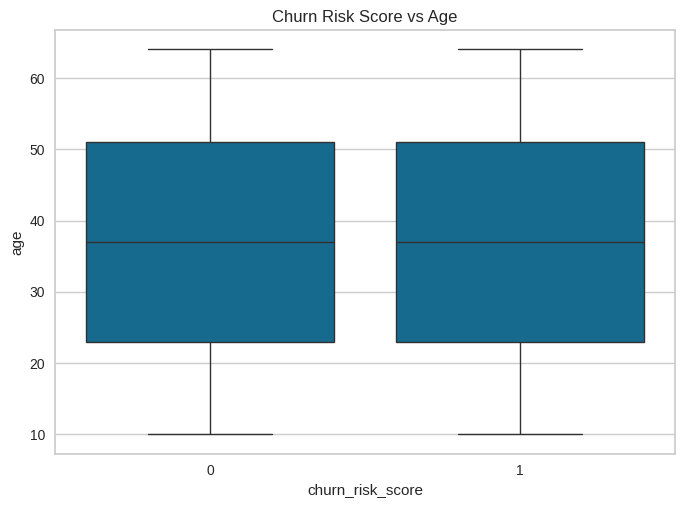

In [ ]:
sns.boxplot(x='churn_risk_score', y='age', data=df)
plt.title('Churn Risk Score vs Age')
plt.show()

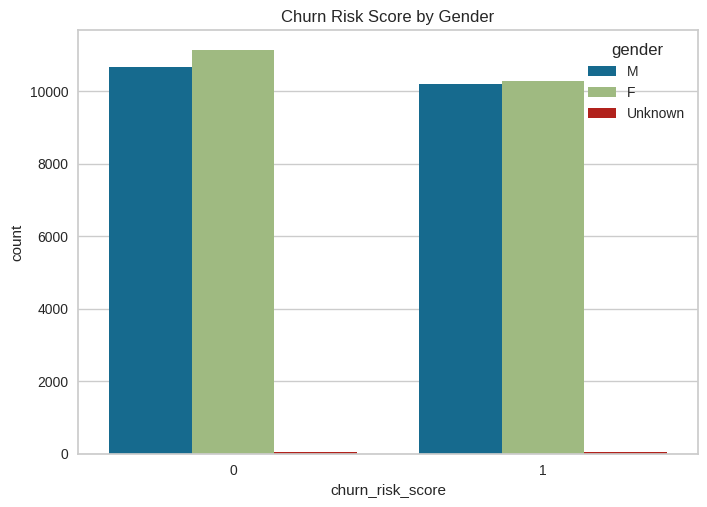

In [ ]:
sns.countplot(x='churn_risk_score', hue='gender', data=df)
plt.title('Churn Risk Score by Gender')
plt.show()


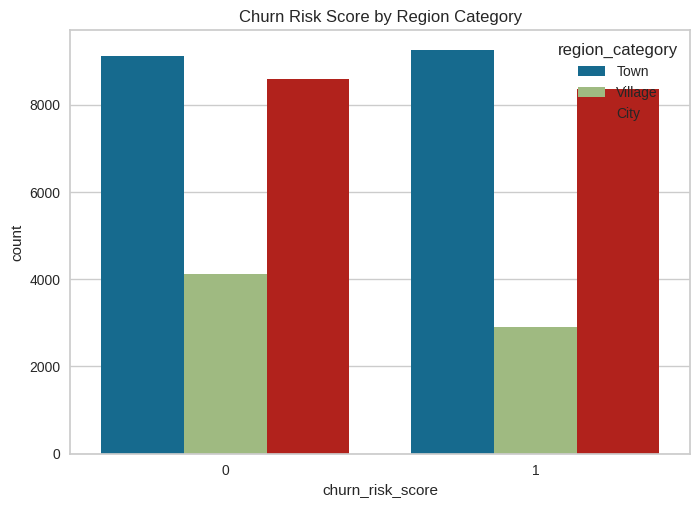

In [ ]:
sns.countplot(x='churn_risk_score', hue='region_category', data=df)
plt.title('Churn Risk Score by Region Category')
plt.show()


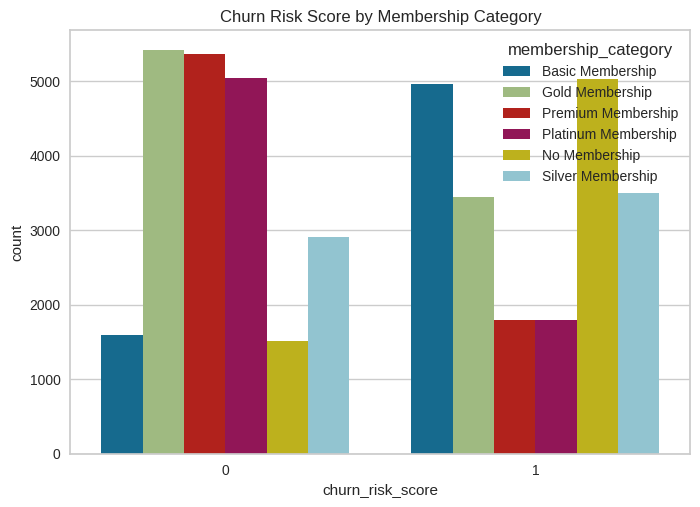

In [ ]:
sns.countplot(x='churn_risk_score', hue='membership_category', data=df)
plt.title('Churn Risk Score by Membership Category')
plt.show()


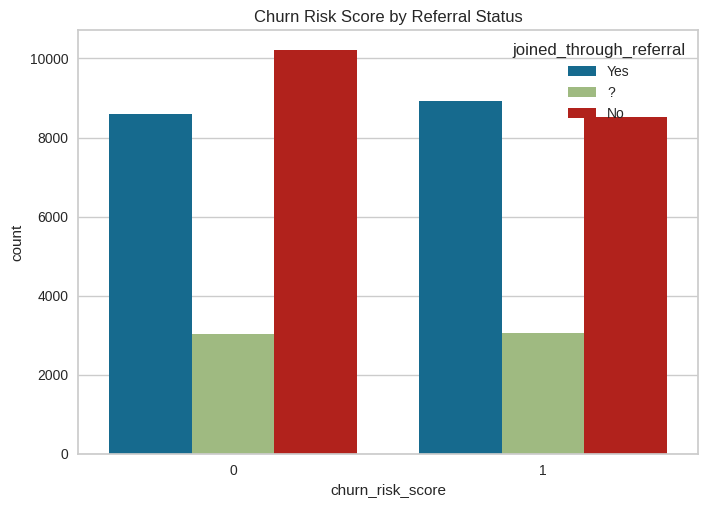

In [ ]:
sns.countplot(x='churn_risk_score', hue='joined_through_referral', data=df)
plt.title('Churn Risk Score by Referral Status')
plt.show()


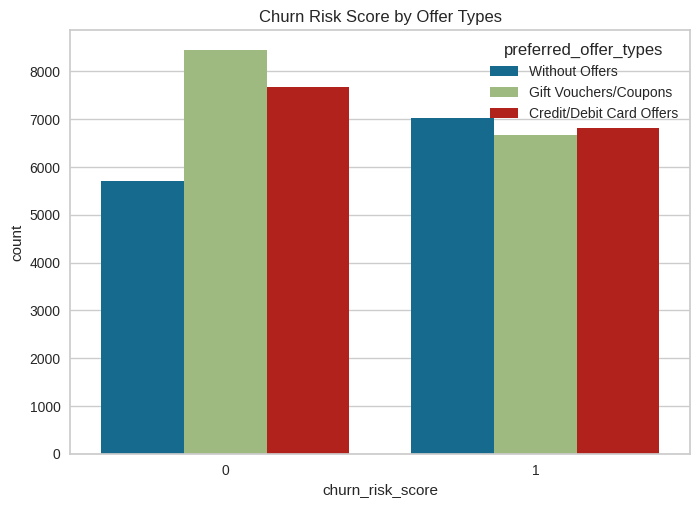

In [ ]:
sns.countplot(x='churn_risk_score', hue='preferred_offer_types', data=df)
plt.title('Churn Risk Score by Offer Types')
plt.show()


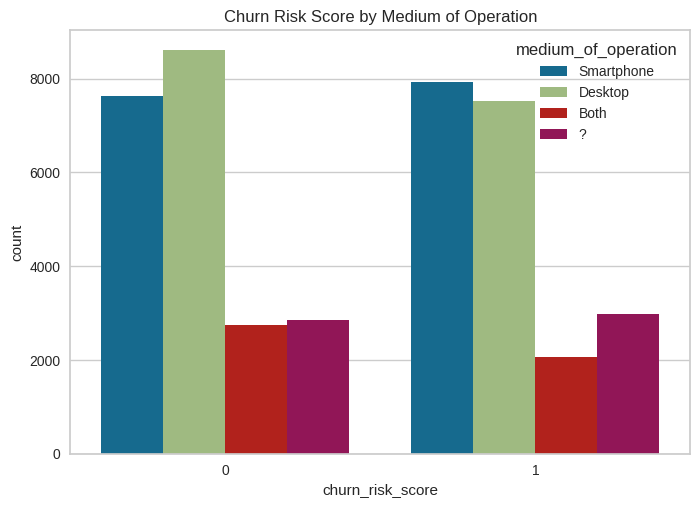

In [ ]:
sns.countplot(x='churn_risk_score', hue='medium_of_operation', data=df)
plt.title('Churn Risk Score by Medium of Operation')
plt.show()


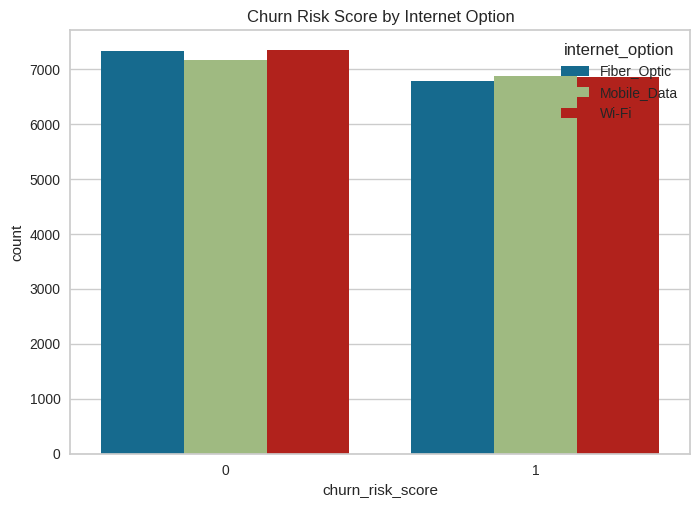

In [ ]:
sns.countplot(x='churn_risk_score', hue='internet_option', data=df)
plt.title('Churn Risk Score by Internet Option')
plt.show()


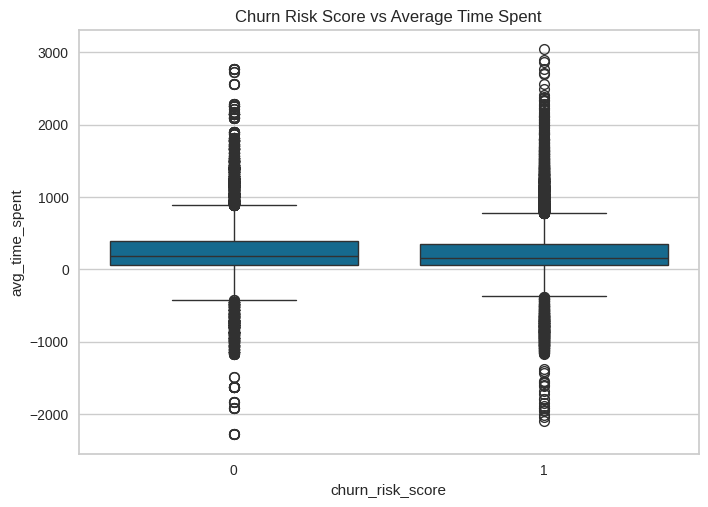

In [ ]:
sns.boxplot(x='churn_risk_score', y='avg_time_spent', data=df)
plt.title('Churn Risk Score vs Average Time Spent')
plt.show()


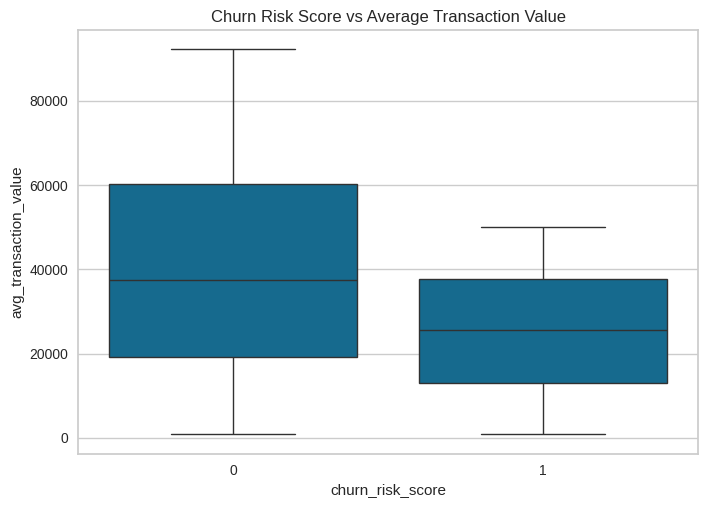

In [ ]:
sns.boxplot(x='churn_risk_score', y='avg_transaction_value', data=df)
plt.title('Churn Risk Score vs Average Transaction Value')
plt.show()


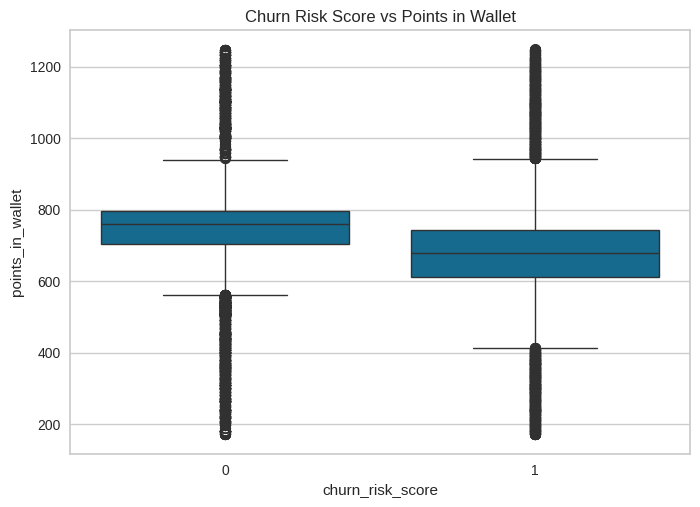

In [ ]:
sns.boxplot(x='churn_risk_score', y='points_in_wallet', data=df)
plt.title('Churn Risk Score vs Points in Wallet')
plt.show()


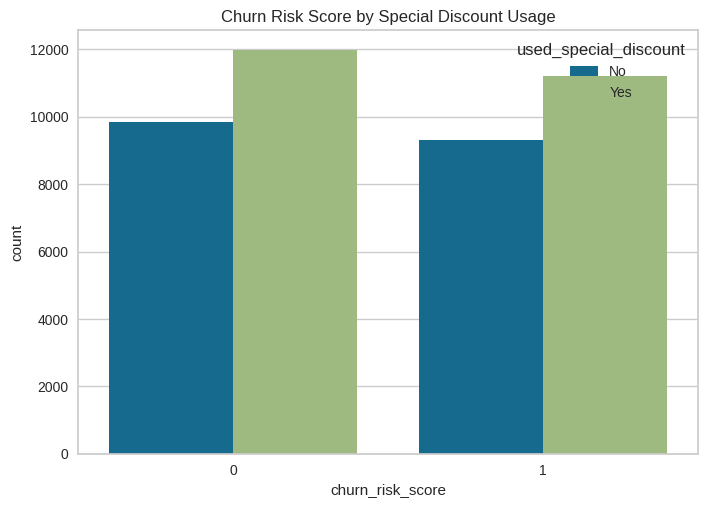

In [ ]:
sns.countplot(x='churn_risk_score', hue='used_special_discount', data=df)
plt.title('Churn Risk Score by Special Discount Usage')
plt.show()


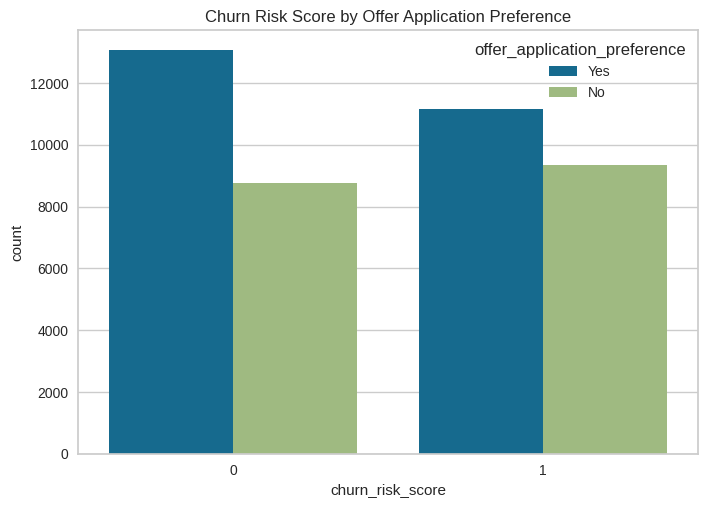

In [ ]:
sns.countplot(x='churn_risk_score', hue='offer_application_preference', data=df)
plt.title('Churn Risk Score by Offer Application Preference')
plt.show()


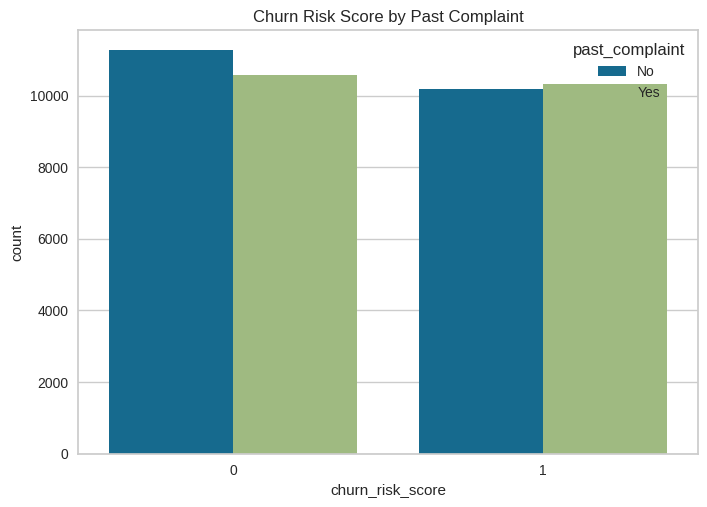

In [ ]:
sns.countplot(x='churn_risk_score', hue='past_complaint', data=df)
plt.title('Churn Risk Score by Past Complaint')
plt.show()


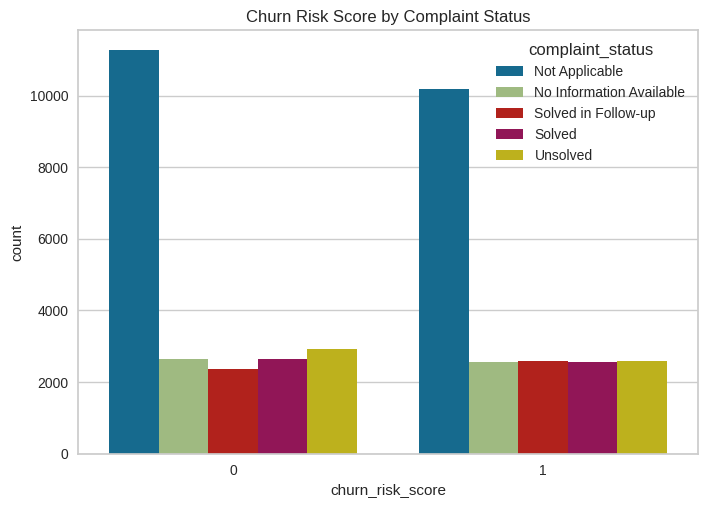

In [ ]:
sns.countplot(x='churn_risk_score', hue='complaint_status', data=df)
plt.title('Churn Risk Score by Complaint Status')
plt.show()


In [ ]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le


In [ ]:
def calculate_outliers(df,column):
    outlier_counts = {}

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_counts[column] = outliers.shape[0]

    return outlier_counts

In [ ]:
calculate_outliers(df,'points_in_wallet')

{'points_in_wallet': 4442}

In [ ]:
calculate_outliers(df,'avg_transaction_value')

{'avg_transaction_value': 388}

In [ ]:
print(df['churn_risk_score'].value_counts())


churn_risk_score
0    21826
1    20511
Name: count, dtype: int64


In [ ]:

X = df.drop(columns=['churn_risk_score'])
y = df['churn_risk_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RandomForest model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9863013698630136
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4322
           1       0.99      0.98      0.99      4146

    accuracy                           0.99      8468
   macro avg       0.99      0.99      0.99      8468
weighted avg       0.99      0.99      0.99      8468

Confusion Matrix:
 [[4277   45]
 [  71 4075]]


In [ ]:



# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train an Extra Trees Classifier
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees.fit(X_train, y_train)

# Predict on the test set
y_pred = extra_trees.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9888993859234766
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4322
           1       0.99      0.99      0.99      4146

    accuracy                           0.99      8468
   macro avg       0.99      0.99      0.99      8468
weighted avg       0.99      0.99      0.99      8468

Confusion Matrix:
 [[4260   62]
 [  32 4114]]
